In [1]:
#Import de paquetes necesarios
import matplotlib.pylab as pl
import numpy as np
from matplotlib import pyplot as plt
import math as mt
from scipy import optimize
import scipy as sp
import pandas as pd

In [2]:
#Constantes útiles
d_LiF= 2.014e-10 #m

U_k= 9.979 #keV

## Análisis de la dependencia de la intensidad con I y V

Primero organizo los datos en un DataFrame para usarlos más izi

In [3]:
column_names_V = ["Ángulo (rad)","U=11kV","U=12kV","U=13kV","U=14kV","U=15kV","U=16kV","U=17kV","U=18kV","U=19kV","U=20kV",
                 "U=21kV","U=22kV","U=23kV","U=24kV","U=25kV","U=26kV","U=27kV","U=28kV","U=29kV","U=30kV","U=31kV","U=32kV",
                 "U=33kV","U=34kV","U=35kV"]

column_names_I = ["Ángulo (rad)","I=0.1mA","I=0.2mA","I=0.3mA","I=0.4mA","I=0.5mA","I=0.6mA","I=0.7mA","I=0.8mA","I=0.9mA",
                  "I=1.0mA"]

df_V = pd.read_csv("A3_Icte.csv", header=0, names=column_names_V, index_col=False) #DataFarme con los datos de I constante
#print(df_V)

df_I = pd.read_csv("A3_Vcte.csv", header=0, names=column_names_I, index_col=False) #DataFarme con los datos de V constante
print(df_I)

    Ángulo (rad)    I=0.1mA    I=0.2mA    I=0.3mA    I=0.4mA    I=0.5mA  \
0       0.331613   0.421502   0.843005   1.264507   1.686010   2.107512   
1       0.333358   0.413553   0.827107   1.240660   1.654214   2.067767   
2       0.335103   0.405735   0.811471   1.217206   1.622942   2.028677   
3       0.336849   0.398076   0.796152   1.194227   1.592303   1.990379   
4       0.338594   0.390953   0.781907   1.172860   1.563814   1.954767   
5       0.340339   0.387972   0.775943   1.163915   1.551887   1.939859   
6       0.342085   0.413394   0.826787   1.240181   1.653574   2.066968   
7       0.343830   0.580598   1.161196   1.741794   2.322392   2.902990   
8       0.345575   1.241772   2.483545   3.725317   4.967090   6.208862   
9       0.347321   3.049163   6.098326   9.147489  12.196652  15.245815   
10      0.349066   6.430069  12.860138  19.290207  25.720276  32.150345   
11      0.350811  10.464954  20.929908  31.394862  41.859816  52.324770   
12      0.352557  12.7604

In [4]:
V = df_V.to_dict(orient='series') #Series (array) de los datos

I = df_I.to_dict(orient='series') #Series (array) de los datos

$\textbf{3.}$ Graficar y analizar los datos para corriente constante y voltaje constante en función de $\lambda$ en dos gráficas separadas.

Primero calculamos la longitud de onda de cada ángulo usando la ley de Bragg:<br><br>
<center>
$
\begin{equation}
    \lambda_n= \frac{2}{n}d\sin\theta
\end{equation}
$
<center>

In [5]:
def longitud_de_onda(angulo, d):
    return 2*d*np.sin(angulo)

λ_V= longitud_de_onda(V["Ángulo (rad)"], d_LiF) #en metros (I cte)

λ_I= longitud_de_onda(I["Ángulo (rad)"], d_LiF) #en metros (V cte)

In [6]:
U  = np.arange(11,36,1) #array con los voltajes aplicados

I_A= np.arange(0.1,1.1,0.1) #array con las corrientes aplicadas

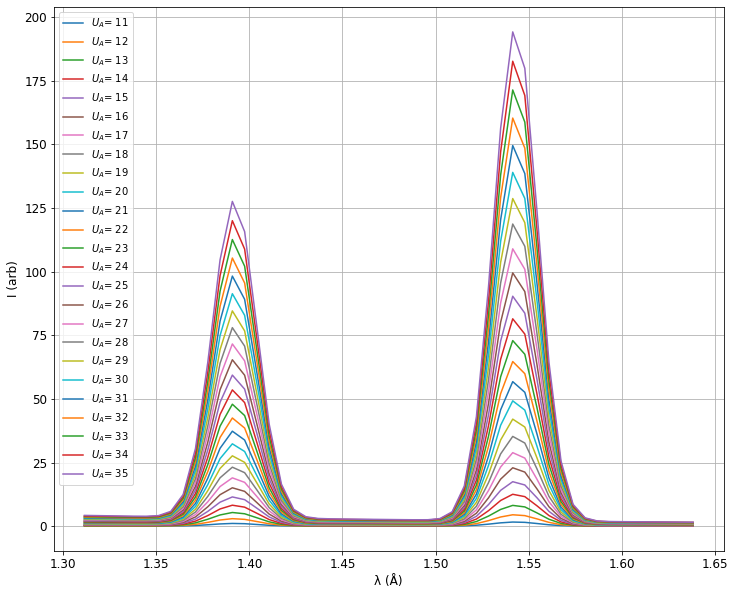

In [7]:
#Gráfica de λ vs I para el diferentes voltajes U
plt.figure(figsize=(12, 10))

i=0
for column in column_names_V[1:]:
    plt.plot(λ_V*1e10, V[column], label = r"$U_A$= "+str(U[i]))
    i+=1
    
plt.xlabel("λ (Å)", size = 'large') 
plt.xticks(size = 'large')
plt.ylabel("I (arb)", size = 'large') 
plt.yticks(size = 'large')
plt.legend(loc="upper left")
plt.grid(True) 
plt.savefig("Lambda_vs_I_U")

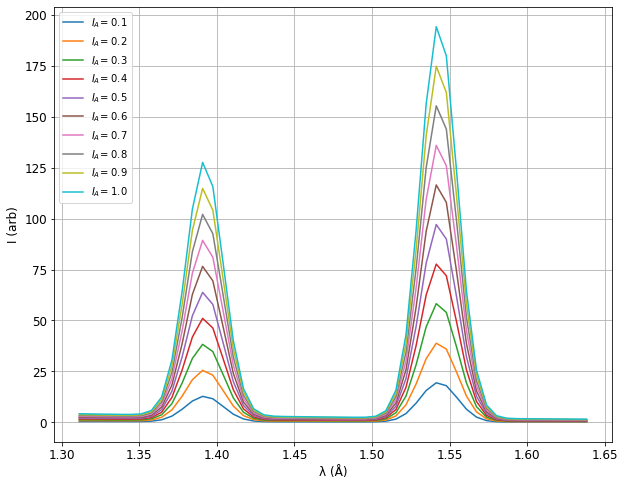

In [8]:
#Gráfica de λ vs I para el diferentes corrientes I_A
plt.figure(figsize=(10, 8))

i=0
for column in column_names_I[1:]:
    plt.plot(λ_I*1e10, I[column], label = r"$I_A$= "+str(round(I_A[i],1)))
    i+=1
    
plt.xlabel("λ (Å)", size = 'large') 
plt.xticks(size = 'large')
plt.ylabel("I (arb)", size = 'large') 
plt.yticks(size = 'large')
plt.legend(loc="upper left")
plt.grid(True) 
plt.savefig("Lambda_vs_I_I")

In [9]:
#K alpha y beta para corriente constante

K_bV= []
K_aV= []

for column in column_names_V[1:]:
    K_bV.append(max(V[column][:25]))
    
for column in column_names_V[1:]:
    K_aV.append(max(V[column][25:]))

K_bV= np.array(K_bV)
K_aV= np.array(K_aV)

In [10]:
#K alpha y beta para voltaje constante

K_bI= []
K_aI= []

for column in column_names_I[1:]:
    K_bI.append(max(I[column][:25]))
    
for column in column_names_I[1:]:
    K_aI.append(max(I[column][25:]))

K_bI= np.array(K_bI)
K_aI= np.array(K_aI)

$\text{4.}$ Realizar una gráfica para la intensidad de $K_{\alpha}$ y $K_{\beta}$ en función de la corriente (para voltaje constante)


In [11]:
def ya(x,a):
    return a*x

In [12]:
params1, params_covariance = optimize.curve_fit( ya, I_A, K_bI, p0=[2]) #Realiza una regresión y encuentra 'a= params'
b1 = params1[0]/(35-U_k)**(3/2) #mA^{-1}}*kV^{-3/2}

params2, params_covariance = optimize.curve_fit( ya, I_A, K_aI, p0=[2]) #Realiza una regresión y encuentra 'a= params'
b2 = params2[0]/(35-U_k)**(3/2) #mA^{-1}}*kV^{-3/2}

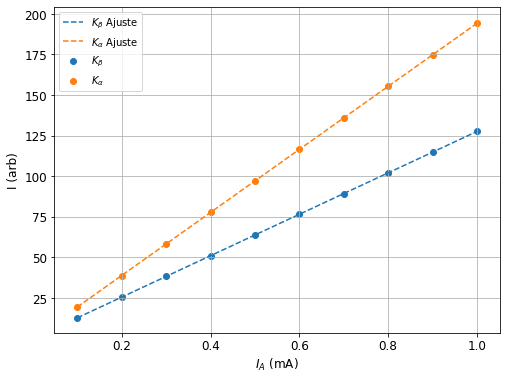

In [13]:
#Gráfica de I_A vs I de K_b
plt.figure(figsize=(8, 6))
plt.scatter(I_A, K_bI, label = r"$K_{\beta}$")
plt.scatter(I_A, K_aI, label = r"$K_{\alpha}$")
plt.plot(I_A, ya(I_A, params1[0]), '--', label = r"$K_{\beta}$ Ajuste")
plt.plot(I_A, ya(I_A, params2[0]), '--', label = r"$K_{\alpha}$ Ajuste")
plt.xlabel(r"$I_A$ (mA)", size = 'large') 
plt.xticks(size = 'large')
plt.ylabel("I (arb)", size = 'large') 
plt.yticks(size = 'large')
plt.legend(loc="upper left")
plt.grid(True) 
plt.savefig("I_vs_I_alpha_beta")

$\textbf{5.}$ Realizar una gráfica para la intensidad de $K_{\alpha}$ y $K_{\beta}$ en función de $U_A$ y otra en función de $(U_A − U_K)^{3/2}$. ¿Cuál se ajusta mejor?

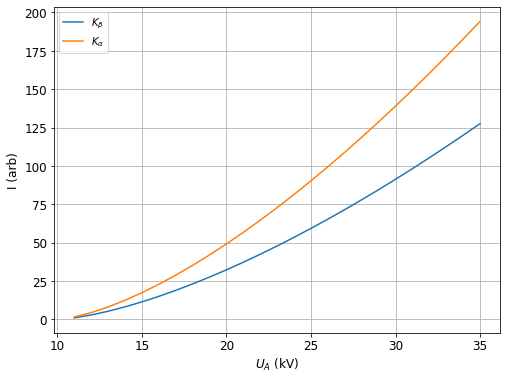

In [14]:
#Gráfica de U_A vs I de K_b
plt.figure(figsize=(8, 6))
plt.plot(U, K_bV, label = r"$K_{\beta}$")
plt.plot(U, K_aV, label = r"$K_{\alpha}$")
plt.xlabel(r"$U_A$ (kV)", size = 'large') 
plt.xticks(size = 'large')
plt.ylabel("I (arb)", size = 'large') 
plt.yticks(size = 'large')
plt.legend(loc="upper left")
plt.grid(True) 
plt.savefig("U_vs_I_alpha_beta")

In [15]:
params3, params_covariance = optimize.curve_fit( ya, (U-U_k)**(3/2), K_bV, p0=[2]) #Realiza una regresión y encuentra 'a= params'
b3 = params3[0]/1 #mA^{-1}}*kV^{-3/2}

params4, params_covariance = optimize.curve_fit( ya, (U-U_k)**(3/2), K_aV, p0=[2]) #Realiza una regresión y encuentra 'a= params'
b4 = params4[0]/1 #mA^{-1}}*kV^{-3/2}

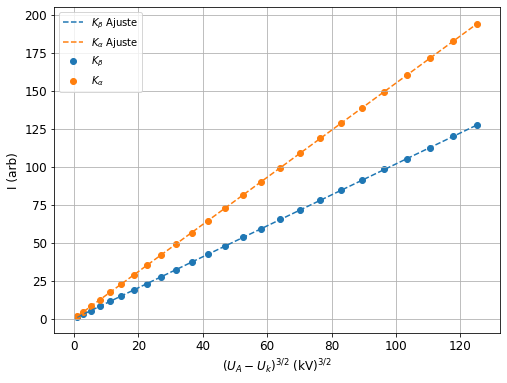

In [16]:
#Gráfica de (U_A-U_k)^{3/2} vs I de K_b
plt.figure(figsize=(8, 6))
plt.scatter((U-U_k)**(3/2), K_bV, label = r"$K_{\beta}$")
plt.scatter((U-U_k)**(3/2), K_aV, label = r"$K_{\alpha}$")
plt.plot((U-U_k)**(3/2), ya((U-U_k)**(3/2), params3[0]), '--', label = r"$K_{\beta}$ Ajuste")
plt.plot((U-U_k)**(3/2), ya((U-U_k)**(3/2), params4[0]), '--', label = r"$K_{\alpha}$ Ajuste")
plt.xlabel(r"$(U_A-U_k)^{3/2}$ (kV)$^{3/2}$", size = 'large') 
plt.xticks(size = 'large')
plt.ylabel("I (arb)", size = 'large') 
plt.yticks(size = 'large')
plt.legend(loc="upper left")
plt.grid(True) 
plt.savefig("Uk_vs_I_alpha_beta")

$\textbf{6.}$ ¿A partir de las gráficas anteriores, podría determinar la constante b?

In [17]:
print(b1,b2,b3,b4)

1.01955314750074 1.5518226362461254 1.0195531477350073 1.5518226361912202


In [35]:
x = I_A #mA
y = K_bI #arb
N = len(I_A)
a = params1[0] #S.I.
b = 0

def inc_pendiente(x,y,N,a,b):
    S= sum((y-b-a*x)**2)
    return np.sqrt((S/(N-2))*sum(x**2)/(N*sum(x**2)-sum(x)**2))


Δb13= round(inc_pendiente(x,y,N,a,b),10)

In [36]:
x = I_A #mA
y = K_aI #arb
N = len(I_A)
a = params2[0] #S.I.
b = 0

def inc_pendiente(x,y,N,a,b):
    S= sum((y-b-a*x)**2)
    return np.sqrt((S/(N-2))*sum(x**2)/(N*sum(x**2)-sum(x)**2))


Δb24= round(inc_pendiente(x,y,N,a,b),10)

In [37]:
print("b_beta =",round(b1,10),"±",Δb13, "mA^{-1}*kV^{-3/2}")
print("\nb_alpha=",round(b2,10),"±",Δb24, "mA^{-1}*kV^{-3/2}")

b_beta = 1.0195531475 ± 2e-10 mA^{-1}*kV^{-3/2}

b_alpha= 1.5518226362 ± 2e-10 mA^{-1}*kV^{-3/2}
